# Hand Written Digit Recognizer

Here we'll use the MNIST dataset whose input sample of is a 28 x 28 grayscale image of a digit (0-9) which is size-normalized and centered. Pixel values are normalized to [-1,1] range for better convergence.

<img src='assets/mnist.png'>

## Import Resources

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Load the Dataset

In [4]:
(training_set, testing_set), dataset_info = tfds.load('mnist', split=['train', 'test'], as_supervised = True, with_info = True)

## Create Pipeline

In [5]:
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

num_training_examples = dataset_info.splits['train'].num_examples

batch_size = 64

training_batches = training_set.cache().shuffle(num_training_examples//4).batch(batch_size).map(normalize).prefetch(1)
testing_batches = testing_set.map(normalize).batch(batch_size).prefetch(1)

## Build the Model

In [6]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

## Train the Model

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
EPOCHS = 5

history = model.fit(training_batches, epochs = EPOCHS)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.2744 - accuracy: 0.9210
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1167 - accuracy: 0.9649
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0806 - accuracy: 0.9750
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0603 - accuracy: 0.9811
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0462 - accuracy: 0.9858


## Check Predictions

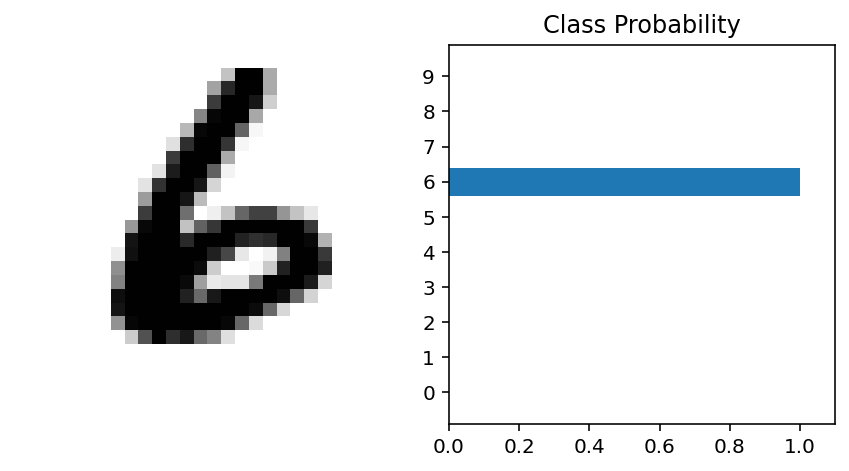

In [9]:
for image_batch, label_batch in training_batches.take(1):
    ps = model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]
  
  
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(10), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()

## Evaluate Loss and Accuracy on the Test Set

In [10]:
loss, accuracy = model.evaluate(testing_batches)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))

    157/Unknown - 1s 5ms/step - loss: 0.0774 - accuracy: 0.9757- 1s 5ms/step - loss: 0.0770 - accur - 1s 5ms/step - loss: 0.0
Loss on the TEST Set: 0.077
Accuracy on the TEST Set: 97.570%


## Check Predictions

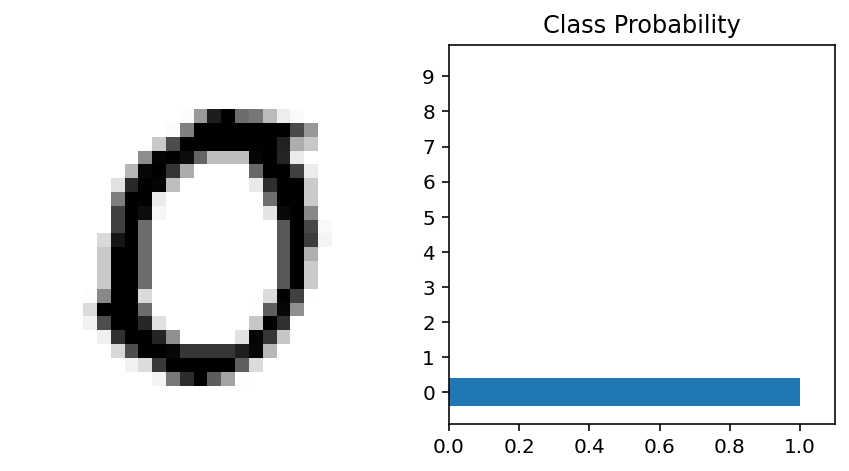

In [11]:
for image_batch, label_batch in training_batches.take(1):
    ps = model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]
  
  
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(10), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()